In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os, sys
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import pandas as pd
from geodatasets import get_path
import ast
# import geopy.distance
from tqdm import tqdm

sys.path.append('../src/')
sys.path.append('../content/')
import data_utils as du
import vis_utils as vu
import loadpaths
path_dict_pecl = loadpaths.loadpaths()
# import shapely
# from tqdm import tqdm, tqdm_notebook
# import ast, shutil

## Download EO data from Google Earth Engine via API

*API key required:* assuming a file `content/api_keys.py` that just contains the line `GEE_API = '<key>'`

In [5]:
import ee, geemap
import api_keys

ee.Authenticate()
ee.Initialize(project=api_keys.GEE_API)
geemap.ee_initialize()

In [21]:
# tmp = du.get_gee_image_from_point(coords_keep[0], image_collection='dsm',
                                #   threshold_size=1)
tmp = du.download_gee_image(coords_keep[0], name='tmp-dsm', image_collection='dsm', resize_image=True)
# tmp.getInfo()

Generating URL ...
Please wait ...
Data downloaded to /Users/tplas/data/2025-10 neureo/sample/tmp-dsm_dsm_y-2024.tif


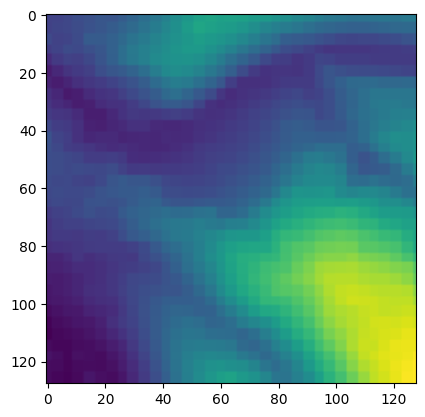

In [17]:
plt.imshow(np.squeeze(tmp[0].values))

In [ ]:
# tmp_coords_list = [(-5.829883, 54.248818),
#                 (-4.247973, 51.627768),
#                 (-4.05749, 52.521469),
#                 (-1.226506, 50.891421),
#                 (-2.361399, 52.385976),
#                 (-1.554099, 50.830184),
#                 (-0.208709, 51.842453),
#                 (1.005961, 51.331986),
#                 (-0.828484, 50.888106),
#                 (-1.420833, 52.403092)]

coords_keep = pd.read_csv('../content/coords_pecl_filtered_30km.csv')
coords_keep = [tuple(x) for x in coords_keep.values]
coords_keep

# tmp = du.download_gee_image(tmp_coords_list[0], name='tmp-dynamicworld', image_collection='dynamicworld', resize_image=True)

du.download_list_coord(
                    #    coord_list=tmp_coords_list, 
                    #    name_group='pecl-fig', path_save='../content/sample_data',
                       coord_list=coords_keep,
                        # coord_list=[coords_keep[i] for i in list_inds_redo],
                       name_group='pecl176', path_save='/Users/tplas/data/2025-10 neureo/pecl-176-subsample-30km',
                       start_index=0, stop_index=None)

# for ii, tmp_coords in enumerate(tmp_coords_list):
#     im, path_im = du.download_gee_image(coords=tmp_coords, name=f'pecl-fig-{ii}',  verbose=0,
#                                         path_save='../content/sample_data',
#                                                 image_collection='dynamicworld')

In [46]:
du.download_gee_image(coords=tmp_coords, name='sample-0', image_collection='alphaearth')

Generating URL ...
Please wait ...
Data downloaded to /Users/tplas/data/2025-10 neureo/sample/sample-0_alphaearth_y-None.tif


(<xarray.DataArray (band: 64, y: 128, x: 128)>
 [1048576 values with dtype=float64]
 Coordinates:
   * band         (band) int64 1 2 3 4 5 6 7 8 9 ... 56 57 58 59 60 61 62 63 64
   * x            (x) float64 5.759e+05 5.76e+05 5.76e+05 ... 5.772e+05 5.772e+05
   * y            (y) float64 6.012e+06 6.012e+06 ... 6.014e+06 6.014e+06
     spatial_ref  int64 0
 Attributes:
     AREA_OR_POINT:           Area
     TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
     TIFFTAG_XRESOLUTION:     1
     TIFFTAG_YRESOLUTION:     1
     _FillValue:              -inf
     scale_factor:            1.0
     add_offset:              0.0,
 '/Users/tplas/data/2025-10 neureo/sample/sample-0_alphaearth_y-None.tif')

# Plot data

Sentinel-2: (4, 128, 128) <class 'xarray.core.dataarray.DataArray'>
AlphaEarth: (64, 128, 128) <class 'xarray.core.dataarray.DataArray'>
Dynamic World: (9, 128, 128) <class 'xarray.core.dataarray.DataArray'>
WorldClimBio: <class 'dict'> dict_keys(['bio01', 'bio02', 'bio03', 'bio04', 'bio05', 'bio06', 'bio07', 'bio08', 'bio09', 'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17', 'bio18', 'bio19', 'coords', 'name'])
DSM: (1, 128, 128) <class 'xarray.core.dataarray.DataArray'>


Text(0.5, 1.0, 'Dynamic World (water)')

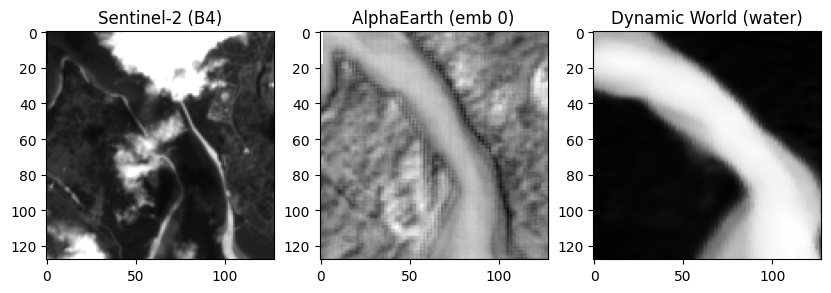

In [39]:
(data_sent, data_alpha, data_dyn, data_worldclim, data_dsm) = du.load_all_modalities_from_name(name='pecl-fig-0', path_folder='../content/sample_data', verbose=1)

fig, ax = plt.subplots(1,3, figsize=(10,3))

ax[0].imshow(np.clip(data_sent[0, ...], 0, 3000) / 3000, cmap='gray')
ax[0].set_title('Sentinel-2 (B4)')
ax[1].imshow(data_alpha[0, ...], cmap='gray')
ax[1].set_title('AlphaEarth (emb 0)')
ax[2].imshow(data_dyn[0, ...], cmap='gray')
ax[2].set_title('Dynamic World (water)')

LC pixel count: Counter({1: 8610, 0: 6882, 7: 417, 6: 382, 2: 87, 8: 5, 5: 1})


/opt/anaconda3/envs/pecl/lib/python3.10/site-packages/matplotlib/cm.py:496: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


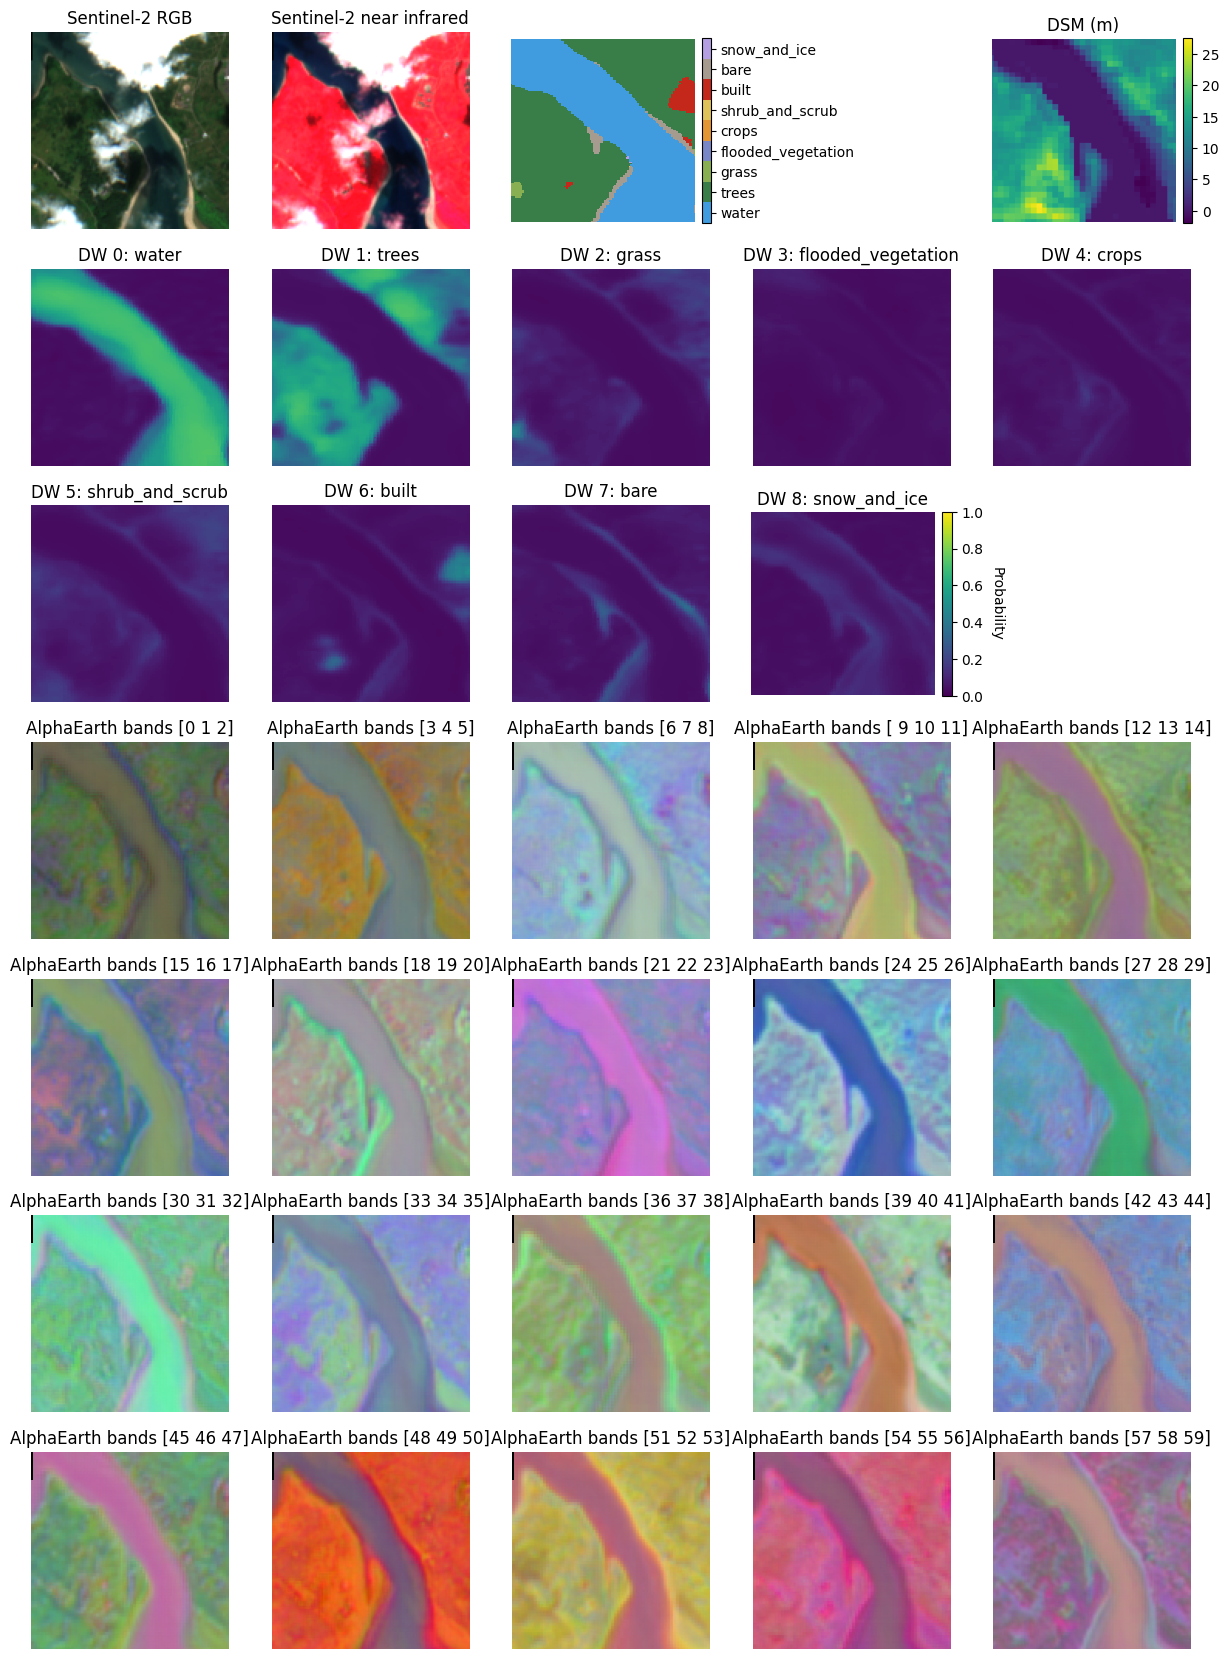

In [41]:
du.plot_overview_images('../content/sample_data', name='pecl-fig-0', plot_alphaearth=True, plot_dynamicworld_full=True)

LC pixel count: Counter({1: 12671, 2: 2522, 0: 1051, 4: 95, 6: 43, 5: 2})


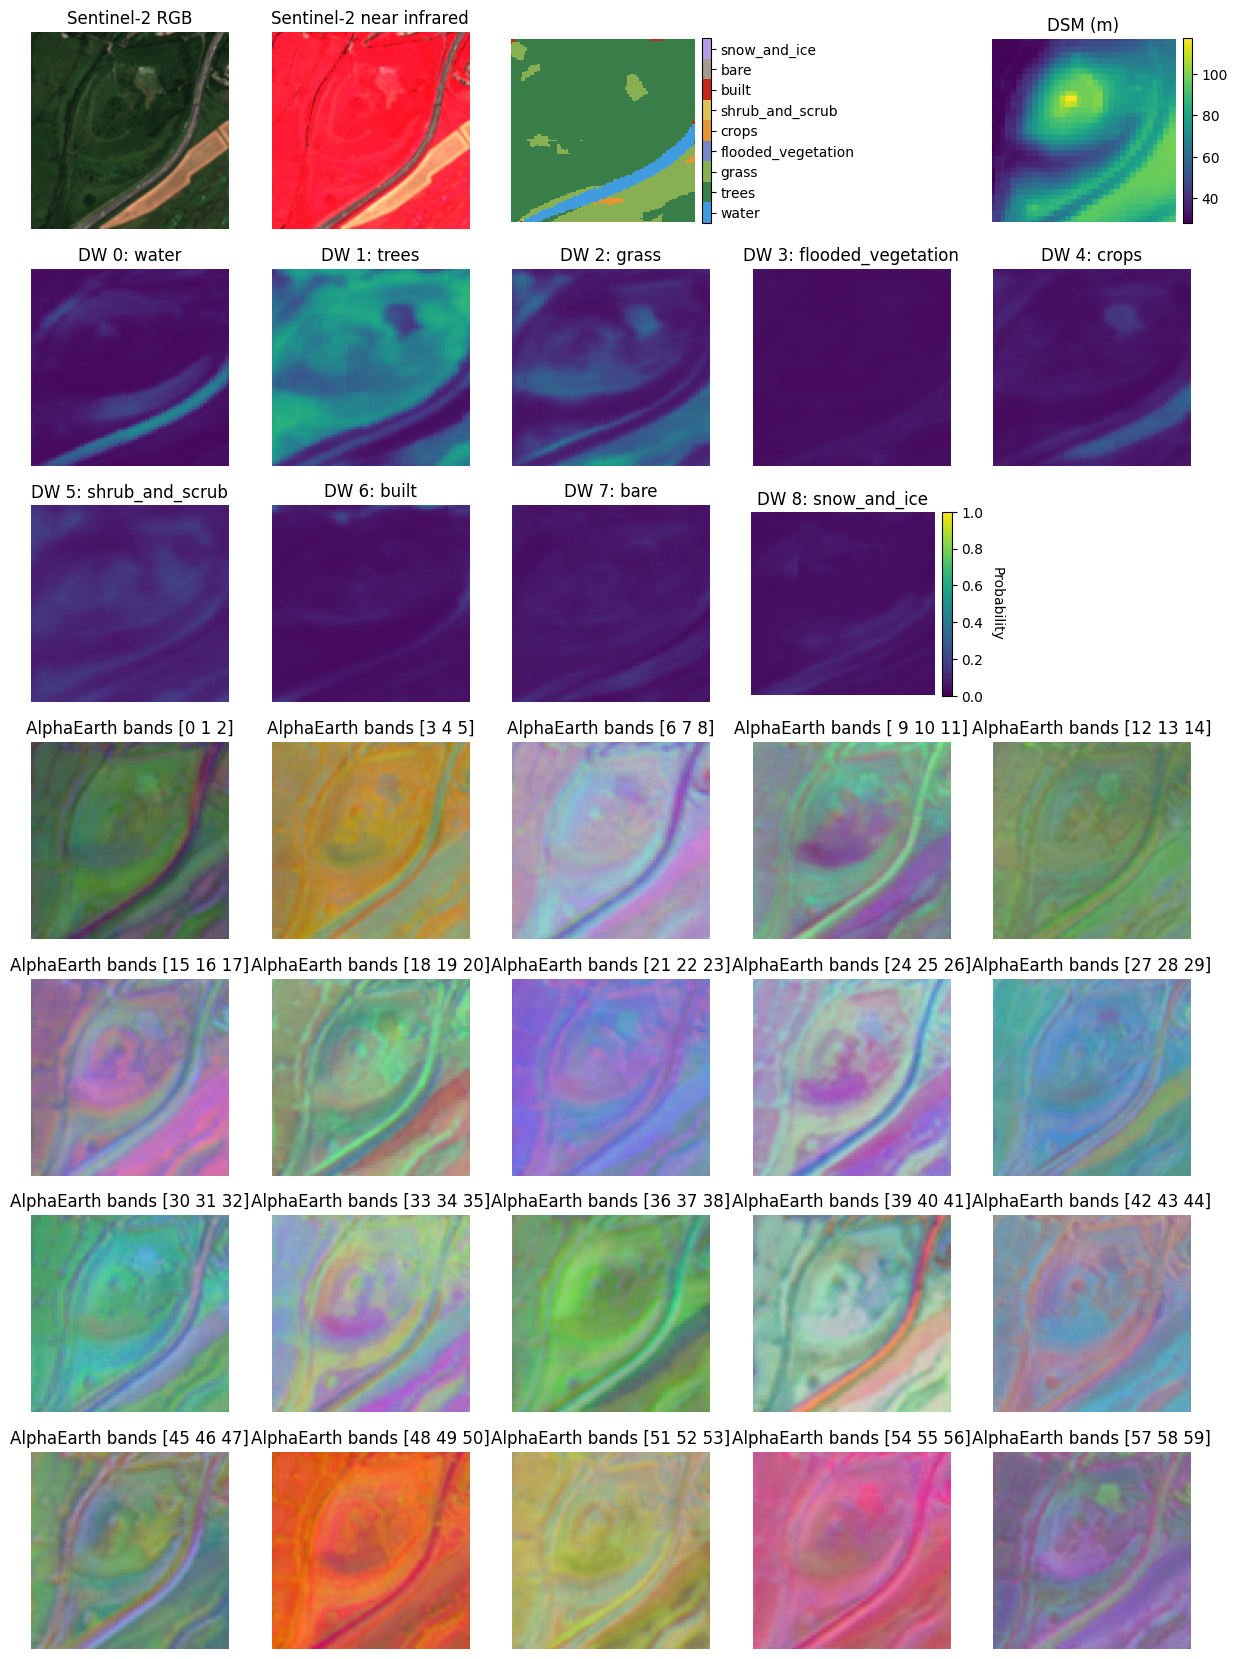

In [35]:
path_folder = '/Users/tplas/data/2025-10 neureo/pecl-100-subsample-45km/'
assert os.path.exists(path_folder)
# os.listdir(path_folder)[0:5]
du.plot_overview_images(path_folder, name='pecl100-4', plot_alphaearth=True, plot_dynamicworld_full=True)

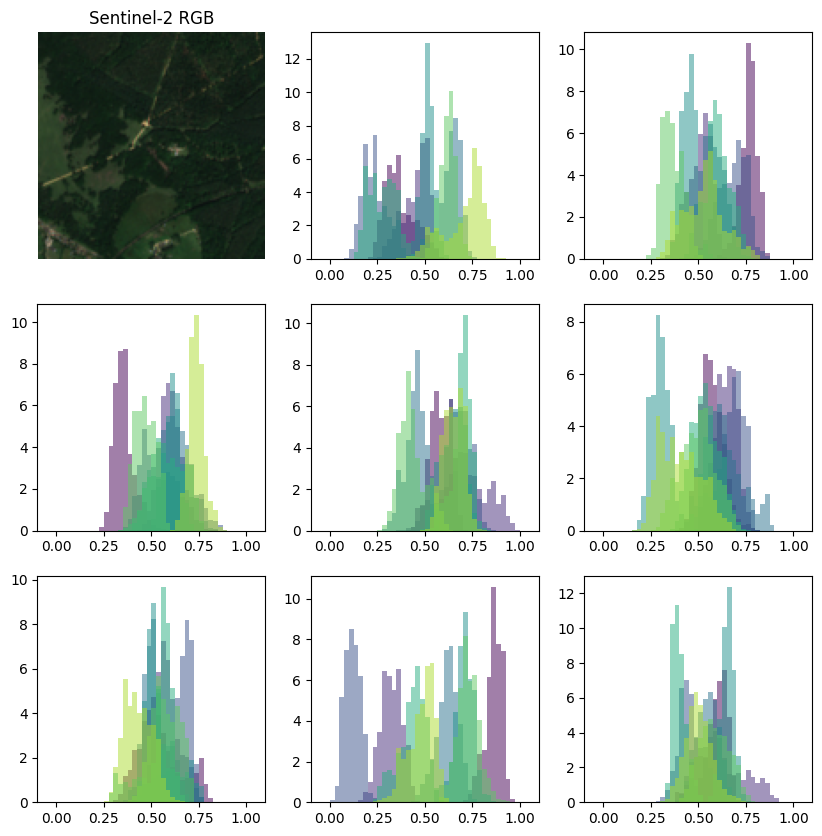

In [13]:
du.plot_distr_embeddings('../content/sample_data', name='pecl-fig-5')

In [91]:
# ## Correlation of each alpha earth band with each sentinel-2 band
# correlation_matrix = np.zeros((im_plot_alpha.shape[0], im_plot_s2.shape[0]))
# for i in range(im_plot_alpha.shape[0]):
#     for j in range(im_plot_s2.shape[0]):
#         band_alpha = im_loaded_alpha[i, ...].values.flatten()
#         band_s2 = im_plot_s2[j, ...].values.flatten()
#         correlation_matrix[i, j] = np.corrcoef(band_alpha, band_s2)[0, 1]

# import seaborn as sns
# sns.scatterplot(correlation_matrix) 

In [93]:
# corr_mat_alpha = np.zeros((im_plot_alpha.shape[0], im_plot_alpha.shape[0]))
# for i in range(im_plot_alpha.shape[0]): 
#     for j in range(im_plot_alpha.shape[0]):
#         band_alpha_i = im_loaded_alpha[i, ...].values.flatten()
#         band_alpha_j = im_loaded_alpha[j, ...].values.flatten()
#         corr_mat_alpha[i, j] = np.corrcoef(band_alpha_i, band_alpha_j)[0, 1]
# # sns.heatmap(corr_mat_alpha, )
# plt.imshow(corr_mat_alpha, cmap='coolwarm', vmin=-1, vmax=1)

# Sample locations:

In [ ]:

path_s2bms_presence = "/Users/tplas/data/2025-04-11 S2BMS/ukbms_species-presence/bms_presence_y-2018-2019_th-200.csv"
df_s2bms = pd.read_csv(path_s2bms_presence)
coords_s2bms = list(df_s2bms['tuple_coords'].apply(lambda x: ast.literal_eval(x)))
shuffled_inds = np.random.permutation(len(coords_s2bms))

In [30]:
min_threshold_km = 30
coords_keep = [] 
for ind in tqdm(shuffled_inds):
    coord = coords_s2bms[ind]
    add_coord = True
    if len(coords_keep) == 0:
        coords_keep.append(coord)
        continue
    
    for c in coords_keep:
        dist = geopy.distance.distance(coord, c).km
        if dist < min_threshold_km:
            add_coord = False
            break
    if add_coord:
        coords_keep.append(coord)
    # if len(coords_keep) >= 100:
    #     break

len(coords_keep)

100%|██████████| 1455/1455 [00:03<00:00, 430.56it/s]


176

In [12]:
coords_keep = pd.read_csv('../content/coords_pecl_filtered_30km.csv')
coords_keep = [tuple([float(y) for y in x]) for x in coords_keep.values]
coords_keep

[(-1.109573, 51.798774),
 (-2.39995, 53.392663),
 (-1.297994, 50.864895),
 (-0.334642, 51.970188),
 (-2.155165, 52.233593),
 (1.693422, 52.724552),
 (-0.446685, 51.252356),
 (-1.80728, 54.759287),
 (0.861309, 51.083771),
 (-0.98347, 50.952507),
 (-0.630607, 51.812155),
 (-1.338576, 52.986997),
 (-1.660247, 55.612628),
 (-1.464683, 51.198492),
 (0.576829, 51.360206),
 (-2.838185, 54.262246),
 (-0.953508, 52.894335),
 (-0.331154, 53.228847),
 (-2.871642, 51.430258),
 (-0.792606, 51.175504),
 (-1.373998, 54.640998),
 (-3.732046, 50.593336),
 (0.154361, 51.845355),
 (0.791003, 52.974051),
 (-1.420715, 52.412081),
 (-1.78107, 50.875792),
 (-1.520103, 52.736163),
 (-2.648617, 52.933128),
 (-2.079144, 50.642162),
 (-3.723731, 51.519739),
 (-1.100783, 51.51098),
 (1.091353, 51.320768),
 (-2.983638, 56.471723),
 (-1.276666, 54.011338),
 (-2.650749, 55.988748),
 (-4.158371, 51.566501),
 (-4.230955, 50.38697),
 (-3.139935, 51.805607),
 (-0.214884, 52.418007),
 (-2.547711, 50.80277),
 (-1.965318, 

In [ ]:
from collections import Counter
counter_off = {}
counter_all = Counter(int(x.split('_')[0].split('-')[1]) for x in os.listdir('/Users/tplas/data/2025-10 neureo/pecl-176-subsample-30km/'))
for k, v in counter_all.items():
    if v != 5:
        counter_off[k] = v
print(len(counter_off), len(counter_all))
# counter_off 
inds_complete = sorted([k for k, v in counter_all.items() if v == 5])
# inds_sel_complete = np.random.choice(inds_complete, size=100, replace=False)
file_inds_sel = '../content/inds_pecl_filtered_30km_100.txt'
if os.path.exists(file_inds_sel):
    inds_sel_complete = np.loadtxt(file_inds_sel).astype(int)

23 176


(np.float64(-8.2), np.float64(2.0), np.float64(49.0), np.float64(61.0))

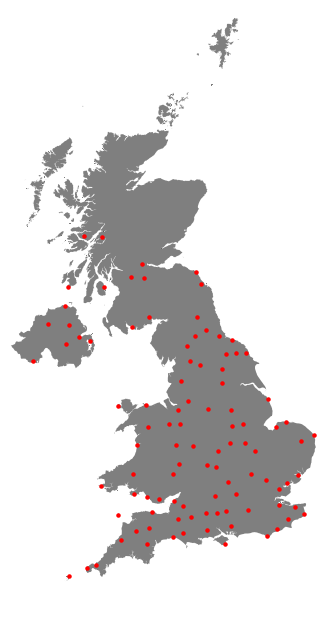

In [ ]:
## plot the selected coordinates on a map
## https://www.diva-gis.org/gdata

path_map = '/Users/tplas/data/2025-10-12 GBR_adm/GBR_adm0.shp'
assert os.path.exists(path_map)

fig_map, ax_map = plt.subplots(1,1, figsize=(5,8))
gdf_uk = gpd.read_file(path_map)
# gdf_uk = gpd.GeoDataFrame(gdf_uk, geometry=gdf_uk.geometry, crs=gdf_uk.crs)
# gdf_uk = gdf_uk.set_geometry('geometry')
gdf_uk['geometry'] = gpd.GeoSeries(gdf_uk['geometry'])
if gdf_uk.crs is None:
    print("CRS is None!")
    gdf_uk = gdf_uk.set_crs('epsg:27700', allow_override=True)
gdf_uk.plot(ax=ax_map, color='k', alpha=0.5)
# print(gdf_uk.crs)
# gdf_uk.crs = 'epsg:27700'
# print(gdf_uk.crs)


point_locs = [coords_keep[x] for x in inds_sel_complete]
# return point_locs|
point_locs = [shapely.geometry.Point(loc) for loc in point_locs]
gdf_bms = gpd.GeoDataFrame(geometry=point_locs)
gdf_bms.crs = gdf_uk.crs
gdf_bms.plot(ax=ax_map, markersize=5, color='red', aspect='auto')
# gdf_bms = gdf_bms.iloc[[126, 167, 370, 457]]
# gdf_bms.plot(ax=ax_map, markersize=5, color=color_dict_stand[0], aspect='auto')
ax_map.set_xlim(-8.2, 2)
ax_map.set_ylim(49, 61)
ax_map.axis('off')

In [26]:
## write inds_sel_complete to file
with open('../content/inds_pecl_filtered_30km_100.txt', 'w') as f:
    for item in sorted(inds_sel_complete):
        f.write("%s\n" % item)

In [35]:
## copy files for selected inds:
folder_original = '/Users/tplas/data/2025-10 neureo/pecl-176-subsample-30km/'
folder_destination = '/Users/tplas/data/2025-10 neureo/pecl-100-subsample-30km/'

assert os.path.exists(folder_original) and os.path.exists(folder_destination)
from tqdm import tqdm
import shutil
for ind in tqdm(inds_sel_complete):
    files = [x for x in os.listdir(folder_original) if x.startswith(f'pecl176-{ind}_')]
    assert len(files) == 5, f'For ind {ind}, found {len(files)} files instead of 5.'
    for f in files:
        shutil.copy(os.path.join(folder_original, f), os.path.join(folder_destination, f))

100%|██████████| 100/100 [00:00<00:00, 138.96it/s]


In [24]:
df_coords_keep = pd.DataFrame([coords_keep[x] for x in inds_sel_complete], columns=['lon', 'lat'])
df_coords_keep.to_csv('../content/coords_pecl_filtered_30km_100.csv', index=False)
df_coords_keep

lon        lat
0  -0.983470  50.952507
1  -1.296463  53.741815
2  -2.568475  51.342204
3  -1.781070  50.875792
4  -0.972789  54.575350
..       ...        ...
95 -2.179747  54.651467
96 -3.672617  50.908974
97 -2.722294  51.080586
98 -3.682808  55.017391
99 -6.312717  55.609121

[100 rows x 2 columns]

In [36]:
from collections import Counter
counter_off = {}
counter_all = Counter([x.split('_')[1] for x in os.listdir('/Users/tplas/data/2025-10 neureo/pecl-100-subsample-30km/')])
for k, v in counter_all.items():
    if v != 100:
        counter_off[k] = v
print(len(counter_off), len(counter_all))
counter_all

0 5


Counter({'alphaearth': 100,
         'worldclimbio': 100,
         'dynamicworld': 100,
         'dsm': 100,
         'sent2-4band': 100})

In [38]:

# Then collect from all patches the alpha and dyn data
patches = 200
hypotheses = []
features = []
sentinel = []
for p in range(patches):
    # (data_sent, data_alpha, data_dyn, data_worldclim, data_dsm) = du.load_all_modalities_from_name(name=f'pecl-fig-{p}', path_folder='../content/sample_data', verbose=1)
    (data_sent, data_alpha, data_dyn, data_worldclim, data_dsm) = du.load_all_modalities_from_name(name=f'pecl176-{p}', path_folder='/Users/tplas/data/2025-10 neureo/pecl-100-subsample-30km', verbose=0)
    
    if data_sent is None:
        continue
    # Land coverage and DSM serve as hypotheses
    assert len(data_dyn.data.shape) == 3 and len(data_dsm.data.shape) == 3 and data_dyn.data.shape[1:] == data_dsm.data.shape[1:]
    hypotheses.append(np.concatenate([data_dyn.data, data_dsm.data], axis=0))
    # This can definitely be cleaner but I use nan for undefined values
    f_dat = data_alpha.data
    f_dat[~np.isfinite(f_dat)] = np.nan
    features.append(f_dat)    
    sentinel.append(data_sent.data)

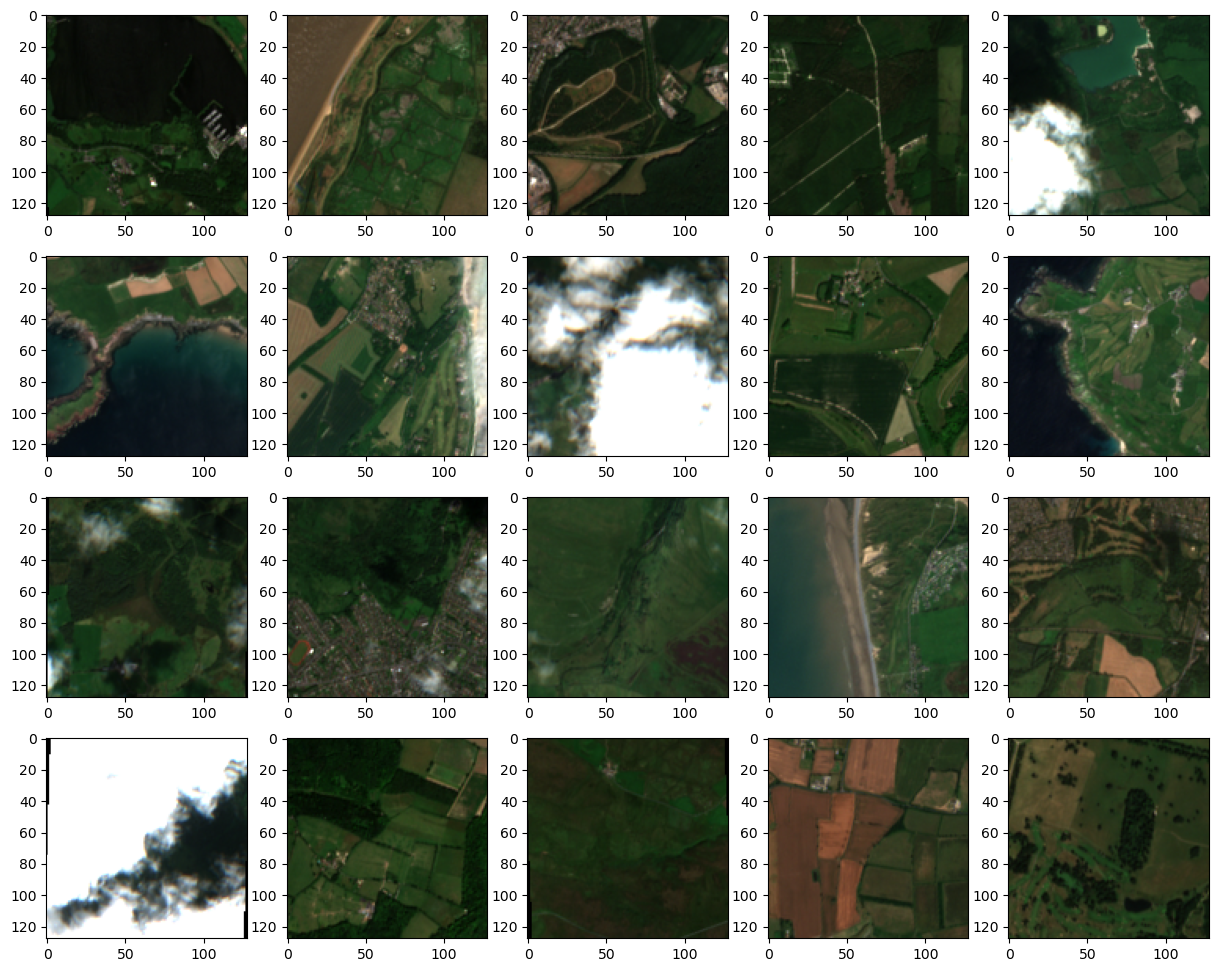

In [51]:
fig, ax = plt.subplots(4, 5, figsize=(15,12))
ax = ax.ravel()

for iplot, ii in enumerate(range(60, 80)):
    du.plot_sent_feat(sentinel[ii], ax=ax[iplot])

In [61]:
ind_feat = 69

## interpolate to 64x64
from scipy.ndimage import zoom
features_resized = []
f_resized = zoom(features[ind_feat], (1, 64/features[ind_feat].shape[1], 64/features[ind_feat].shape[2]), order=1)
f_resized.shape

(64, 64, 64)

In [111]:
len([f for f in features if np.sum(np.isnan(f)) == 0])

79

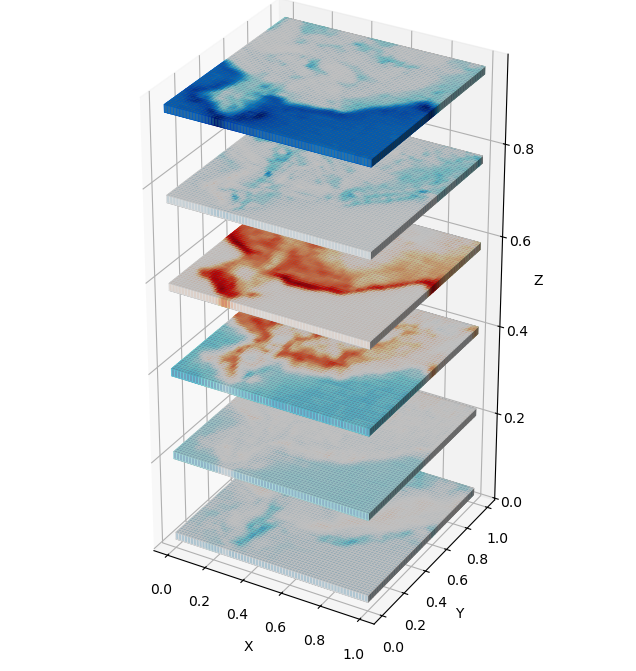

In [ ]:


## Adapted from http://matplotlib.org/stable/gallery/mplot3d/voxels_rgb.html

mat_vals = f_resized
mat_vals = np.swapaxes(mat_vals, 0, 2)  # shape 
mat_vals = np.swapaxes(mat_vals, 0, 1)  # shape
width, depth, height = mat_vals.shape

# Create a 3D grid
x, y, z = np.indices((width+1, depth+1, height+1)) / max(width, depth, height)

# Create a block: True where the voxel exists
cube = np.ones((width, depth, height), dtype=bool)

# Add gaps between height layers
for layer in range(height):
    if layer % 12 != 1:
        cube[:, :, layer] = False  # create gaps

# Map mat_vals to colors
# We'll use a colormap to convert values to RGB
# cmap = plt.cm.viridis  # choose any matplotlib colormap
# norm_vals = (mat_vals - mat_vals.min()) / (mat_vals.max() - mat_vals.min())  # normalize to [0,1]

# colors = np.zeros(cube.shape + (4,))  # RGBA
# colors[cube] = cmap(norm_vals[cube])  # only assign colors to existing voxels

cmap = plt.cm.RdBu_r  # use RdBu_r colormap

# Center normalization at 0
vmax = np.abs(mat_vals).max()
norm_vals = (mat_vals + vmax) / (2 * vmax)  # normalize to [0,1], centered at 0

colors = np.zeros(cube.shape + (4,))  # RGBA
colors[cube] = cmap(norm_vals[cube])  # only assign colors to existing voxels

# Plot
ax = plt.figure(figsize=(10, 8)).add_subplot(projection='3d')
ax.voxels(x, y, z, cube,
          facecolors=colors,
          edgecolors=np.clip(colors[..., :3] * 2 - 0.5, 0, 1),  # brighter edges
          linewidth=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([width, depth, height * 2])
plt.show()


In [105]:

def compute_range_for_band(band_array, transform, maxlag=2000):
    """Compute spatial correlation length (range) in meters."""
    # Get valid pixels
    rows, cols = np.where(~np.isnan(band_array))
    print(len(rows))
    if len(rows) > 5000:  # sample to speed up
        idx = np.random.choice(len(rows), 5000, replace=False)
        rows, cols = rows[idx], cols[idx]

    # Convert to spatial coordinates
    # xs, ys = transform * (cols, rows)
    xs, ys = transform * cols, transform * rows  # assuming 10m resolution
    coords = np.column_stack([xs, ys])
    values = band_array[rows, cols]

    # Compute variogram
    V = Variogram(coords, values, model='exponential', maxlag=maxlag, n_lags=20, bin_func='even')
    # return V.range  # this is in meters
    return V

tmp = compute_range_for_band(features[1][48, ...], 10)

16384


In [104]:
5 * 64 * 100 / 60

533.3333333333334

374.84410046318345


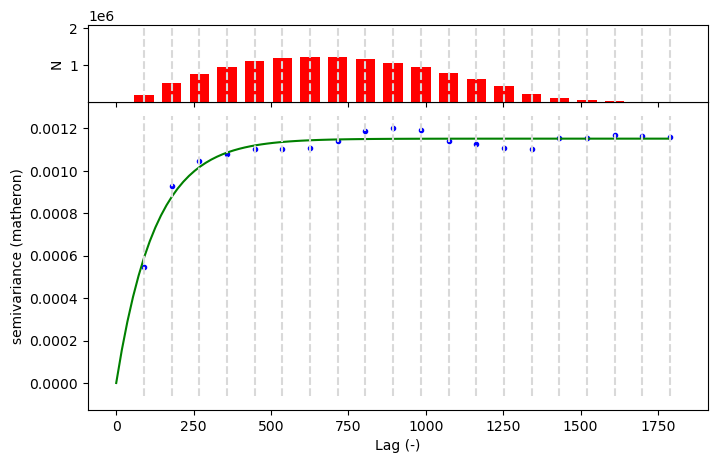

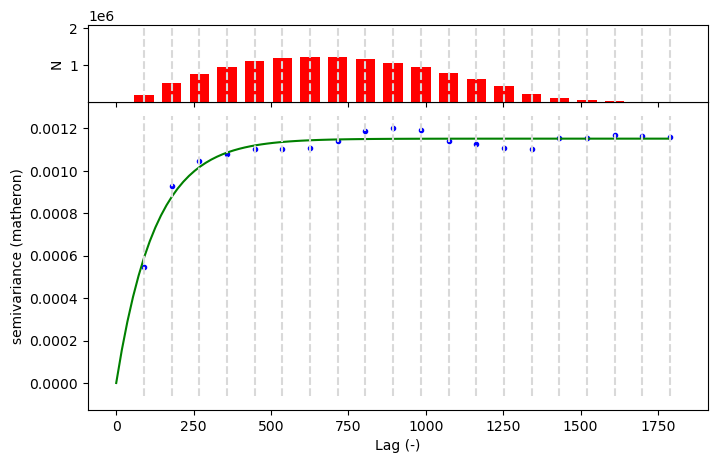

In [106]:
print(tmp.describe()['effective_range'])
tmp.plot()

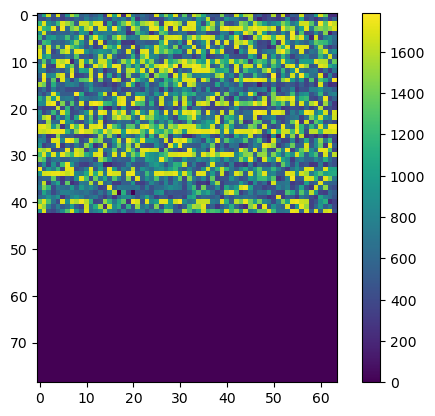

In [116]:
mat_effective_range = np.load('../outputs/spatial_autocorr_pecl100-30km.npy')

plt.imshow(mat_effective_range, cmap='viridis')
plt.colorbar()

# S2-100k

In [ ]:

world = gpd.read_file(get_path("naturalearth.land"))
# ax = world.clip([-90, -55, -25, 15]).plot(color="white", edgecolor="black")

<Axes: >

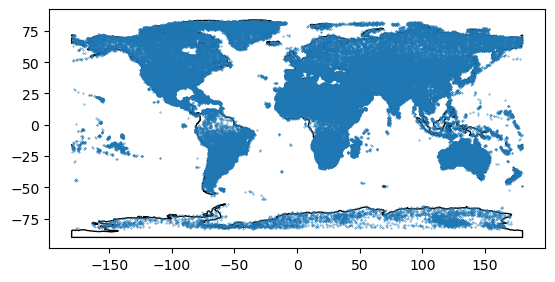

In [89]:
fp_s2100k_index = '/Users/tplas/data/2025-11 s2-100k/index.csv'
df_s2100k = pd.read_csv(fp_s2100k_index)
gdf_s2100k = gpd.GeoDataFrame(df_s2100k, geometry=gpd.points_from_xy(df_s2100k.lon, df_s2100k.lat))
gdf_s2100k.crs = 'epsg:4326'
ax = world.plot(color="white", edgecolor="black")
gdf_s2100k.plot(ax=ax, markersize=.1)

<Axes: >

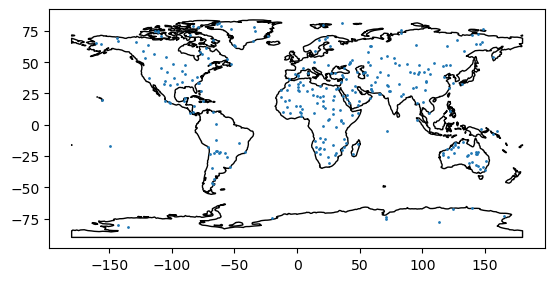

In [103]:
n_s2100 = len(gdf_s2100k)
n_sample = 300 
inds_sample = np.random.choice(n_s2100, size=n_sample, replace=False)
# inds_sample = np.arange(n_sample)
gdf_s2100_sample = gdf_s2100k.iloc[inds_sample]

ax = world.plot(color="white", edgecolor="black")
gdf_s2100_sample.plot(ax=ax, markersize=1)

In [104]:
coord_list_sample = [(row.lon, row.lat) for idx, row in gdf_s2100_sample.iterrows()]
# coord_list_sample

In [107]:
du.download_list_coord(coord_list=coord_list_sample,
                       name_group='s2100k-300', path_save='/Users/tplas/data/2025-10 neureo/s2100k-300-random-2025-11-13',
                       start_index=110, stop_index=None)

# du.download_list_coord(coord_list=coord_list_sample,
#                        name_group='s2100k-100', path_save='/Users/tplas/data/2025-10 neureo/s2100k-100-random-2025-11-13',
#                        start_index=0, stop_index=10,
#                        list_collections=['alphaearth'],
#                        threshold_size=4,
#                        resize_image=False, buffer_m=20)

 38%|███▊      | 114/300 [00:51<02:33,  1.21it/s]

Image s2100k-300-114, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 39%|███▉      | 118/300 [01:47<10:28,  3.45s/it]

Image s2100k-300-118, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 40%|████      | 120/300 [02:07<14:55,  4.97s/it]

Image s2100k-300-120, alphaearth could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.
Image s2100k-300-120, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 41%|████      | 123/300 [02:46<24:38,  8.35s/it]

Image s2100k-300-123, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 43%|████▎     | 129/300 [04:04<33:19, 11.69s/it]

Image s2100k-300-129, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 46%|████▋     | 139/300 [06:09<30:47, 11.47s/it]

Image s2100k-300-139, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 47%|████▋     | 141/300 [06:42<37:13, 14.05s/it]

Image s2100k-300-141, alphaearth could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.
Image s2100k-300-141, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 48%|████▊     | 144/300 [07:13<31:14, 12.01s/it]

Image s2100k-300-144, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 50%|█████     | 150/300 [08:25<29:55, 11.97s/it]

 51%|█████▏    | 154/300 [09:13<30:08, 12.39s/it]

 52%|█████▏    | 155/300 [09:27<31:01, 12.84s/it]

Image s2100k-300-154, dsm could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.


 53%|█████▎    | 160/300 [10:41<36:57, 15.84s/it]

An error occurred while downloading.
Image s2100k-300-160, dynamicworld could not be downloaded, error: /Users/tplas/data/2025-10 neureo/s2100k-300-random-2025-11-13/s2100k-300-160_dynamicworld_y-2024.tif: No such file or directory


 54%|█████▎    | 161/300 [10:52<33:32, 14.48s/it]

Image s2100k-300-161, sentinel2 could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.
Image s2100k-300-161, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 54%|█████▍    | 162/300 [11:03<30:42, 13.35s/it]

 55%|█████▍    | 164/300 [11:26<28:22, 12.52s/it]

Image s2100k-300-164, sentinel2 could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.
Image s2100k-300-164, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 56%|█████▌    | 167/300 [12:39<50:53, 22.96s/it]

Image s2100k-300-166, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 57%|█████▋    | 170/300 [13:17<35:43, 16.49s/it]

Image s2100k-300-170, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 59%|█████▊    | 176/300 [14:33<26:22, 12.76s/it]

Image s2100k-300-176, alphaearth could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.
Image s2100k-300-176, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 61%|██████    | 182/300 [15:47<25:20, 12.88s/it]

Image s2100k-300-182, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 64%|██████▍   | 192/300 [18:10<25:01, 13.91s/it]

Image s2100k-300-192, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 70%|███████   | 210/300 [21:57<18:43, 12.48s/it]

 70%|███████   | 211/300 [22:05<16:47, 11.32s/it]

Image s2100k-300-211, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 72%|███████▏  | 216/300 [23:13<18:17, 13.06s/it]

Image s2100k-300-216, alphaearth could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.
Image s2100k-300-216, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 74%|███████▍  | 222/300 [24:33<17:44, 13.65s/it]

Image s2100k-300-222, sentinel2 could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.
Image s2100k-300-222, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 75%|███████▌  | 225/300 [25:27<21:21, 17.08s/it]

Image s2100k-300-225, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 75%|███████▌  | 226/300 [25:36<17:57, 14.56s/it]

Image s2100k-300-225, dsm could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.


 78%|███████▊  | 235/300 [27:15<11:20, 10.47s/it]

Image s2100k-300-235, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 79%|███████▉  | 237/300 [27:35<10:42, 10.19s/it]

Image s2100k-300-237, alphaearth could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.
Image s2100k-300-237, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 80%|████████  | 241/300 [28:13<09:40,  9.84s/it]

 81%|████████  | 242/300 [28:29<11:24, 11.80s/it]

Image s2100k-300-242, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 83%|████████▎ | 250/300 [30:19<11:00, 13.20s/it]

Image s2100k-300-250, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 84%|████████▍ | 252/300 [30:41<09:39, 12.08s/it]

Image s2100k-300-252, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 84%|████████▍ | 253/300 [30:51<09:05, 11.61s/it]

 85%|████████▌ | 255/300 [31:16<09:02, 12.05s/it]

Image s2100k-300-255, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 85%|████████▌ | 256/300 [31:23<07:43, 10.54s/it]

Image s2100k-300-255, dsm could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.


 87%|████████▋ | 260/300 [32:12<07:36, 11.40s/it]

Image s2100k-300-260, sentinel2 could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.
Image s2100k-300-260, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 88%|████████▊ | 263/300 [32:53<08:31, 13.81s/it]

Image s2100k-300-263, alphaearth could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.
Image s2100k-300-263, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 88%|████████▊ | 264/300 [32:58<06:45, 11.27s/it]

Image s2100k-300-263, dsm could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.
An error occurred while downloading.
Image s2100k-300-264, alphaearth could not be downloaded, error: /Users/tplas/data/2025-10 neureo/s2100k-300-random-2025-11-13/s2100k-300-264_alphaearth_y-2024.tif: No such file or directory


 90%|████████▉ | 269/300 [33:47<05:11, 10.06s/it]

Image s2100k-300-269, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 91%|█████████ | 273/300 [34:35<04:57, 11.01s/it]

Image s2100k-300-273, sentinel2 could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.
Image s2100k-300-273, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 93%|█████████▎| 278/300 [35:33<04:06, 11.22s/it]

Image s2100k-300-278, sentinel2 could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.
Image s2100k-300-278, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 93%|█████████▎| 279/300 [35:44<03:56, 11.25s/it]

 93%|█████████▎| 280/300 [35:50<03:15,  9.75s/it]

 94%|█████████▍| 283/300 [36:29<03:12, 11.32s/it]

Image s2100k-300-283, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 97%|█████████▋| 290/300 [37:50<01:46, 10.62s/it]

Image s2100k-300-290, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 97%|█████████▋| 292/300 [38:09<01:20, 10.09s/it]

 99%|█████████▊| 296/300 [38:55<00:45, 11.36s/it]

Image s2100k-300-296, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


100%|█████████▉| 299/300 [39:35<00:12, 12.58s/it]

100%|██████████| 300/300 [39:45<00:00,  7.95s/it]

Images that could not be downloaded: ['114_sentinel2', '114_worldclimbio', '118_worldclimbio', '120_alphaearth', '120_worldclimbio', '123_worldclimbio', '129_worldclimbio', '139_worldclimbio', '141_alphaearth', '141_worldclimbio', '144_sentinel2', '144_worldclimbio', '150_alphaearth', '154_alphaearth', '154_dsm', '160_dynamicworld', '161_sentinel2', '161_worldclimbio', '161_dsm', '164_sentinel2', '164_worldclimbio', '166_worldclimbio', '166_dsm', '170_worldclimbio', '176_alphaearth', '176_worldclimbio', '182_sentinel2', '182_worldclimbio', '192_worldclimbio', '210_alphaearth', '211_worldclimbio', '216_alphaearth', '216_worldclimbio', '222_sentinel2', '222_worldclimbio', '225_worldclimbio', '225_dsm', '235_worldclimbio', '237_alphaearth', '237_worldclimbio', '240_dsm', '242_worldclimbio', '250_worldclimbio', '252_worldclimbio', '252_dsm', '255_worldclimbio', '255_dsm', '260_sentinel2', '260_worldclimbio', '263_alphaearth', '263_worldclimbio', '263_dsm', '264_alphaearth', '269_worldclimb

['114_sentinel2',
 '114_worldclimbio',
 '118_worldclimbio',
 '120_alphaearth',
 '120_worldclimbio',
 '123_worldclimbio',
 '129_worldclimbio',
 '139_worldclimbio',
 '141_alphaearth',
 '141_worldclimbio',
 '144_sentinel2',
 '144_worldclimbio',
 '150_alphaearth',
 '154_alphaearth',
 '154_dsm',
 '160_dynamicworld',
 '161_sentinel2',
 '161_worldclimbio',
 '161_dsm',
 '164_sentinel2',
 '164_worldclimbio',
 '166_worldclimbio',
 '166_dsm',
 '170_worldclimbio',
 '176_alphaearth',
 '176_worldclimbio',
 '182_sentinel2',
 '182_worldclimbio',
 '192_worldclimbio',
 '210_alphaearth',
 '211_worldclimbio',
 '216_alphaearth',
 '216_worldclimbio',
 '222_sentinel2',
 '222_worldclimbio',
 '225_worldclimbio',
 '225_dsm',
 '235_worldclimbio',
 '237_alphaearth',
 '237_worldclimbio',
 '240_dsm',
 '242_worldclimbio',
 '250_worldclimbio',
 '252_worldclimbio',
 '252_dsm',
 '255_worldclimbio',
 '255_dsm',
 '260_sentinel2',
 '260_worldclimbio',
 '263_alphaearth',
 '263_worldclimbio',
 '263_dsm',
 '264_alphaearth',


In [78]:
coord_list_sample[6]

(83.30869933429632, 46.5441176137056)

(4, 128, 128)


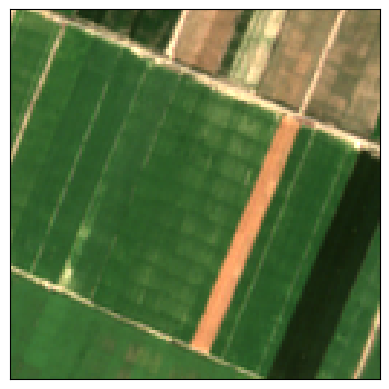

In [91]:
filedir = '/Users/tplas/data/2025-10 neureo/s2100k-100-random-2025-11-12/'
filename = du.create_filename(base_name='s2100k-100-6', image_collection='sentinel2')
filepath = os.path.join(filedir, filename)
assert os.path.exists(filepath), f'File {filepath} does not exist.'
print(du.load_tiff(filepath).shape)
vu.plot_sentinel(du.load_tiff(filepath), clip_im=True)

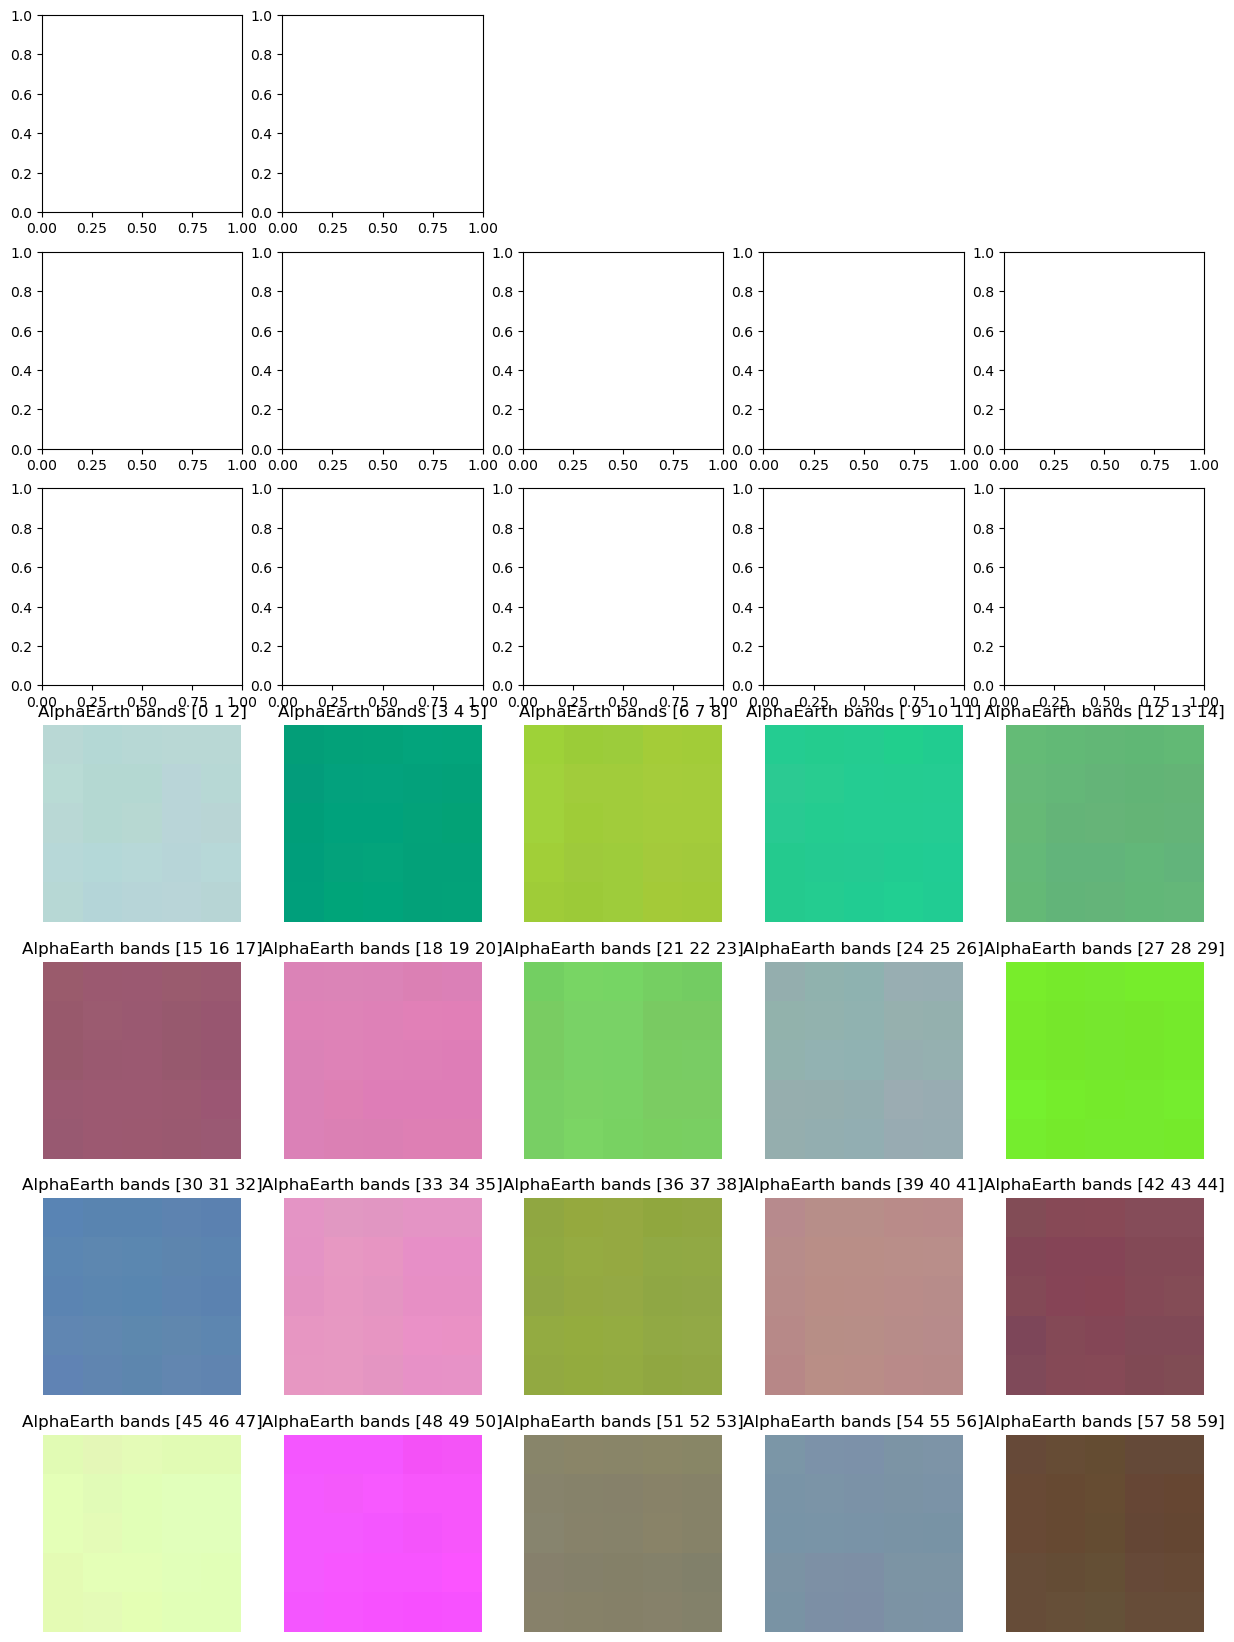

In [98]:
vu.plot_overview_images('/Users/tplas/data/2025-10 neureo/s2100k-100-random-2025-11-13/', 
                        name='s2100k-100-6', plot_alphaearth=True, plot_dynamicworld_full=True)